# Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset

In [2]:

file_path = '/content/drive/MyDrive/MachineLearningFinal/melb_data_cleaned.xlsx'
df = pd.read_excel(file_path)

# Data processing

In [3]:
# Select features and target variable
features = ['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
            'BuildingArea', 'YearBuilt', 'Regionname', 'Propertycount', 'Method']
target = 'Price'

In [4]:

# Drop rows with missing values in the selected features and target
df_cleaned = df[features + [target]].dropna()

In [5]:
# Encode categorical features
label_encoders = {}
categorical_features = ['Type', 'Regionname', 'Method']
for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Split data into train and test sets

In [6]:

X = df_cleaned[features]
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest with GridSearchCV for hyperparameter tuning

In [7]:

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_absolute_error', verbose=1)

In [8]:

# Best model from GridSearch
best_model = grid_search.best_estimator_

In [9]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate the model

In [10]:
# Model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [11]:
# Display evaluation metrics
evaluation_metrics = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2)": r2,
    "Best Parameters": grid_search.best_params_
}
print("Evaluation Metrics:")
print(evaluation_metrics)

Evaluation Metrics:
{'Mean Absolute Error (MAE)': 183320.36806518227, 'Mean Squared Error (MSE)': 92486985561.82382, 'Root Mean Squared Error (RMSE)': 304116.73015772057, 'R-squared (R2)': 0.7750698267036524, 'Best Parameters': {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}}


In [12]:
# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

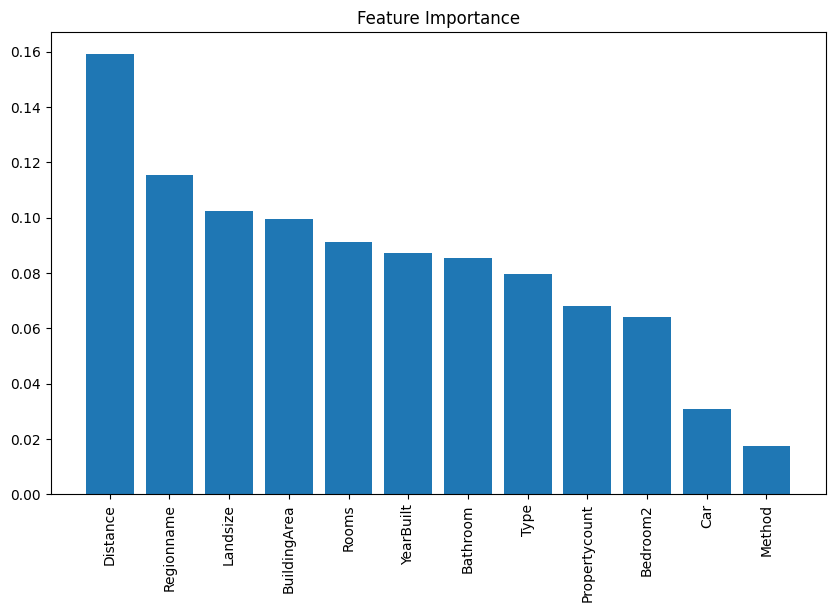

In [13]:
# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.title("Feature Importance")
plt.show()

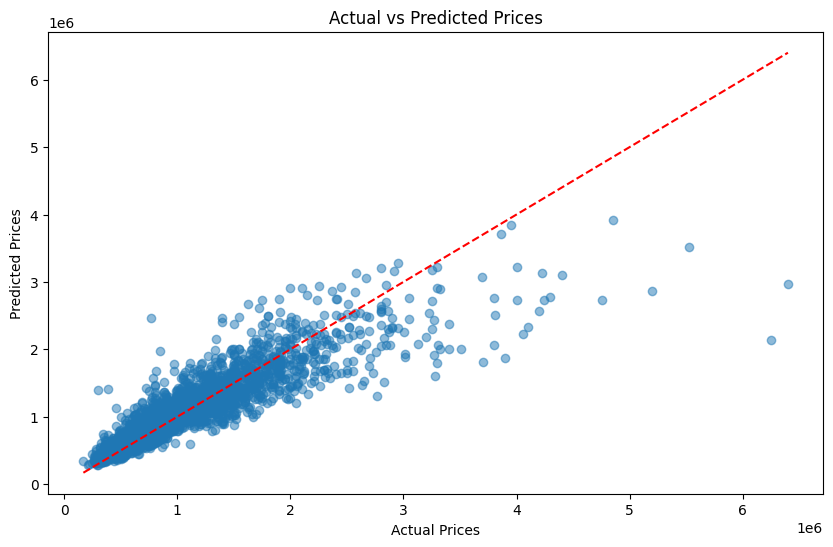

In [14]:
# Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Predict sample

In [15]:
# Take 5 random houses from the test set
sample_data = X_test.sample(5, random_state=42)
sample_data['Actual_Price'] = y_test.loc[sample_data.index]
sample_data['Predicted_Price'] = best_model.predict(sample_data.drop(columns=['Actual_Price']))

# Display sample data
sample_display = sample_data[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
                               'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount',
                               'Actual_Price', 'Predicted_Price']]
print("Sample predictions for 5 houses:")
print(sample_display)


Sample predictions for 5 houses:
      Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
993       4      13.1         4         4    4       707           162   
8832      2       5.3         2         1    1      2338          1482   
5324      2       2.6         2         1    0       108            72   
9079      3      10.1         3         2    2       602           180   
1491      4      11.8         4         2    2       744           300   

      YearBuilt  Propertycount  Actual_Price  Predicted_Price  
993        1926           4605       1670000     2.104078e+06  
8832       1965          11308        450000     5.700565e+05  
5324       1900          14949       1035000     9.971080e+05  
9079       1970           7822       1570000     1.615757e+06  
1491       1985           4480       1300000     1.346712e+06  
